In [1]:
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
import math,time
import numpy as np
import quandl
quandl.ApiConfig.api_key = 'enter key'


stock = 'AAPL'

data = quandl.get_table('WIKI/PRICES', ticker = stock, 
                        qopts = { 'columns': ['ticker', 'date', 'adj_close'] }, 
                        date = { 'gte': '2010-12-31', 'lte': '2018-8-2' }, 
                        paginate=True)
data.tail()
print (data.dtypes)

Using TensorFlow backend.


ticker               object
date         datetime64[ns]
adj_close           float64
dtype: object


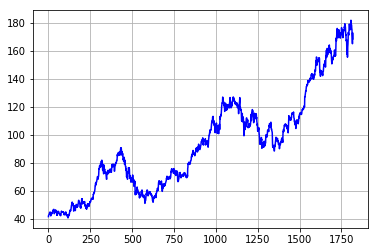

In [2]:
y = data['adj_close']
X= np.arange(0,len(y))
X = np.array(X)
y = np.array(y) 
y_int=y

plt.plot(X,y,'b')
plt.grid(True)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
y=y.reshape(-1, 1)
y = scaler.fit_transform(y)


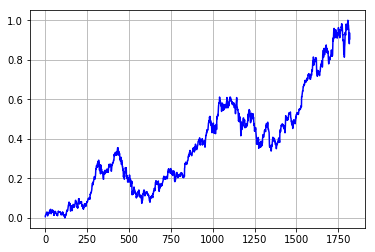

In [3]:
plt.plot(X,y,'b')
plt.grid(True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


X_train = np.array(X_train[:,np.newaxis])
X_test = np.array(X_test[:,np.newaxis])

timestamp = 1

X_train = X_train.reshape(X_train.shape[0] ,timestamp, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0] ,timestamp, X_test.shape[1])


y_train = y_train.reshape(y_train.shape[0],1)
y_test = y_test.reshape(y_test.shape[0],1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)



(1218, 1, 1)
(601, 1, 1)
(1218, 1)
(601, 1)


In [5]:
model = Sequential()
model.add(LSTM(
    input_shape=(1,1),
    units=512,
    return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(
    units=256,
    return_sequences=True))

model.add(Dropout(0.4))

model.add(LSTM(
    units=128,
    return_sequences=False))

model.add(Dropout(0.4))

model.add(Dense(128,kernel_initializer='uniform',activation='relu'))        
model.add(Dense(64,kernel_initializer='uniform',activation='relu'))        
model.add(Dense(1))

print(model.summary())


model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
start = time.time()
print ('compilation time : ', time.time() - start)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 1, 512)            1052672   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 1, 256)            787456    
_________________________________________________________________
dropout_2 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
__________

In [6]:
model.compile(loss='mean_squared_error', optimizer='adam' , metrics = ['mean_squared_error'])

In [7]:
model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=100,
    validation_split=0.05)

Train on 1157 samples, validate on 61 samples
Epoch 1/100
1157/1157 [==============================] - 5s 4ms/step - loss: 0.1934 - mean_squared_error: 0.1934 - val_loss: 0.1658 - val_mean_squared_error: 0.1658
Epoch 2/100
1157/1157 [==============================] - 1s 511us/step - loss: 0.1405 - mean_squared_error: 0.1405 - val_loss: 0.0700 - val_mean_squared_error: 0.0700
Epoch 3/100
1157/1157 [==============================] - 1s 495us/step - loss: 0.0683 - mean_squared_error: 0.0683 - val_loss: 0.0713 - val_mean_squared_error: 0.0713
Epoch 4/100
1157/1157 [==============================] - 1s 506us/step - loss: 0.0700 - mean_squared_error: 0.0700 - val_loss: 0.0489 - val_mean_squared_error: 0.0489
Epoch 5/100
1157/1157 [==============================] - 1s 505us/step - loss: 0.0564 - mean_squared_error: 0.0564 - val_loss: 0.0573 - val_mean_squared_error: 0.0573
Epoch 6/100
1157/1157 [==============================] - 1s 493us/step - loss: 0.0580 - mean_squared_error: 0.0580 - val_

1157/1157 [==============================] - 1s 943us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_loss: 0.0102 - val_mean_squared_error: 0.0102
Epoch 50/100
1157/1157 [==============================] - 1s 612us/step - loss: 0.0116 - mean_squared_error: 0.0116 - val_loss: 0.0088 - val_mean_squared_error: 0.0088
Epoch 51/100
1157/1157 [==============================] - 1s 574us/step - loss: 0.0115 - mean_squared_error: 0.0115 - val_loss: 0.0106 - val_mean_squared_error: 0.0106
Epoch 52/100
1157/1157 [==============================] - 1s 1ms/step - loss: 0.0110 - mean_squared_error: 0.0110 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 53/100
1157/1157 [==============================] - 1s 954us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0080 - val_mean_squared_error: 0.0080
Epoch 54/100
1157/1157 [==============================] - ETA: 0s - loss: 0.0104 - mean_squared_error: 0.01 - 1s 922us/step - loss: 0.0105 - mean_squared_error: 0.0105 - val_l

1157/1157 [==============================] - 1s 473us/step - loss: 0.0102 - mean_squared_error: 0.0102 - val_loss: 0.0075 - val_mean_squared_error: 0.0075
Epoch 98/100
1157/1157 [==============================] - 1s 508us/step - loss: 0.0100 - mean_squared_error: 0.0100 - val_loss: 0.0068 - val_mean_squared_error: 0.0068
Epoch 99/100
1157/1157 [==============================] - 1s 476us/step - loss: 0.0090 - mean_squared_error: 0.0090 - val_loss: 0.0073 - val_mean_squared_error: 0.0073
Epoch 100/100
1157/1157 [==============================] - 1s 504us/step - loss: 0.0106 - mean_squared_error: 0.0106 - val_loss: 0.0085 - val_mean_squared_error: 0.0085


In [8]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]

model_score(model, X_train, y_train, X_test, y_test)



Train Score: 0.00783 MSE (0.09 RMSE)
Test Score: 0.00890 MSE (0.09 RMSE)


(0.007831904538624196, 0.008896599847594038)

In [9]:
p = model.predict(X_test)
p = p.reshape(p.shape[0],1)

y_test = y_test.reshape(y_test.shape[0],1)

y_test = scaler.inverse_transform(y_test)
p = scaler.inverse_transform(p)

print(p.shape)



(601, 1)


Red - Predicted Stock Price of Apple  ,  Blue - Actual Stock Price of Apple


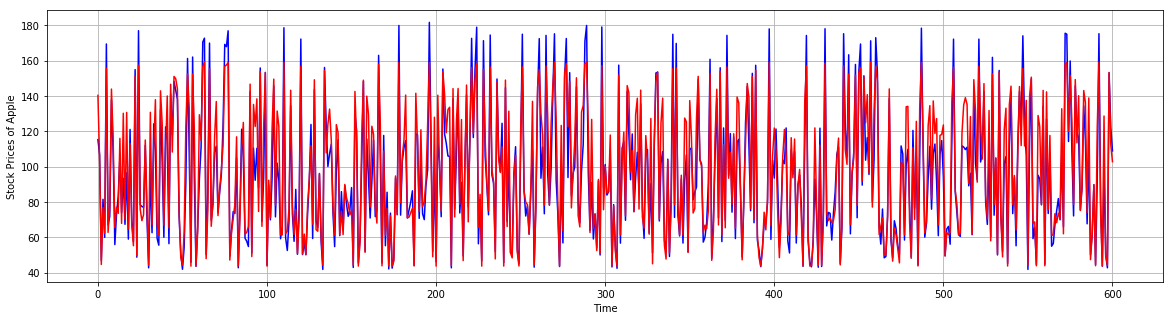

In [10]:
print("Red - Predicted Stock Price of Apple  ,  Blue - Actual Stock Price of Apple")
plt.rcParams["figure.figsize"] = (20,5)
plt.plot(y_test , 'b-')
plt.plot(p , 'red')
plt.xlabel('Time')
plt.ylabel('Stock Prices of Apple')
plt.grid(True)
plt.show()

In [11]:
import pandas as pd

hist = pd.DataFrame(y_int,columns=['Close'])
hist['Close']

hist['Date']=data['date']

def prev_closing(values):
    return values[0]

hist['Close_1D'] = hist['Close'].rolling(window=2,center=False).apply(func=prev_closing)
hist['Close_3D'] = hist['Close'].rolling(window=3,center=False).apply(func=prev_closing)
hist['Close_12D'] = hist['Close'].rolling(window=12,center=False).apply(func=prev_closing)
hist.head(5)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:11: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  # This is added back by InteractiveShellApp.init_path()
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: Currently, 'apply' passes the values as ndarrays to t

,Close,Date,Close_1D,Close_3D,Close_12D
0,41.453456,2010-12-31,NaN,NaN,NaN
1,42.354338,2011-01-03,41.453456,NaN,NaN
2,42.575382,2011-01-04,42.354338,41.453456,NaN
3,42.923655,2011-01-05,42.575382,42.354338,NaN
4,42.888956,2011-01-06,42.923655,42.575382,NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  from ipykernel import kernelapp as app
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: Mean of empty slice.
  if sys.path[0] == '':
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: Mean of empty slice.
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You 

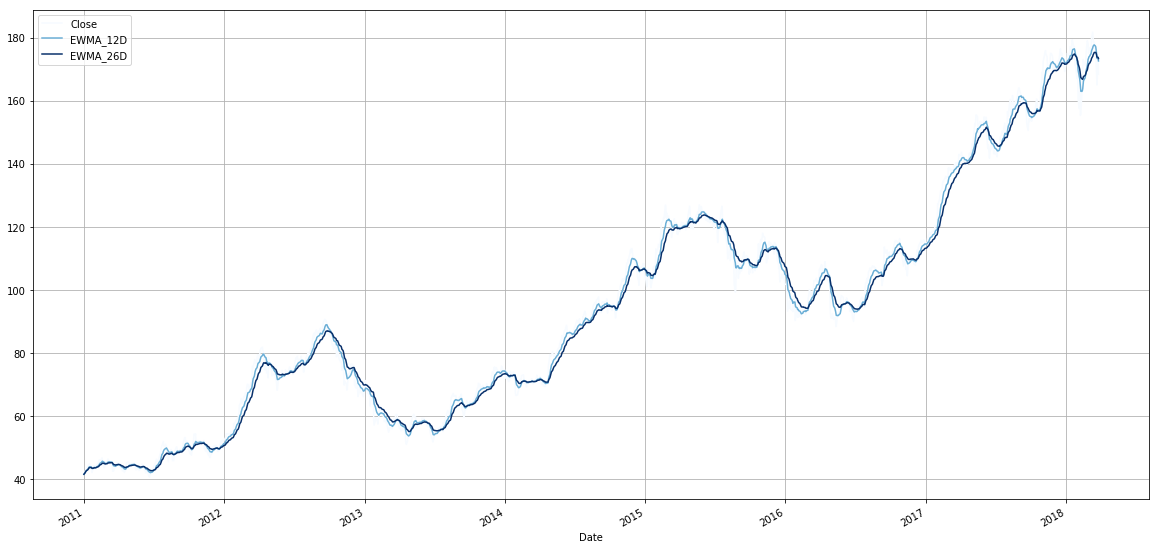

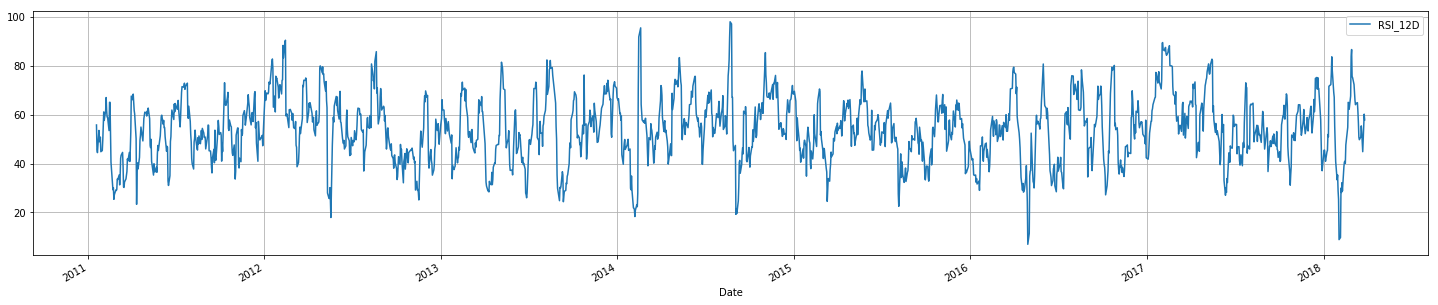

In [12]:
hist["Momentum_1D"] = hist["Close"] - hist["Close_1D"]
hist["Momentum_3D"] = hist["Close"] - hist["Close_3D"]

#ROC

hist["ROC_3D"] = ( hist["Close"] - hist["Close_3D"] ) / hist["Close_3D"] * 100
hist["ROC_12D"] = ( hist["Close"] - hist["Close_12D"] ) / hist["Close_12D"] * 100

#Relative Strength Index

def rsi(values):
    dUp = values[values>0].mean()
    dDown = -1*values[values<0].mean()
    return 100 * dUp / (dUp + dDown)
hist['RSI_6D'] = hist['Momentum_1D'].rolling(center=False,window=6).apply(rsi)
hist['RSI_12D'] = hist['Momentum_1D'].rolling(center=False,window=12).apply(rsi)

# Simple Moving Average

hist['SMA_5D'] = hist['Close'].rolling(center=False,window=5).mean()
hist['SMA_10D'] = hist['Close'].rolling(center=False,window=10).mean()
hist['SMA_20D'] = hist['Close'].rolling(center=False,window=20).mean()
hist['SMA_30D'] = hist['Close'].rolling(center=False,window=30).mean()
hist['SMA_50D'] = hist['Close'].rolling(center=False,window=50).mean()

#EWMA 
hist['EWMA_12D'] = hist['Close'].ewm(span=12).mean()
hist['EWMA_26D'] = hist['Close'].ewm(span=26).mean()

#MACD 
hist['MACD'] = hist['EWMA_12D'] - hist['EWMA_26D']

cm = plt.cm.get_cmap('Blues')

hist.plot(x= 'Date',y=['Close','EWMA_12D','EWMA_26D'],figsize=(20,10),grid=True,colormap=cm)
hist.plot(x= 'Date',y=['RSI_12D',],figsize=(25,5),grid=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1262a47f0>,
      dtype=object)

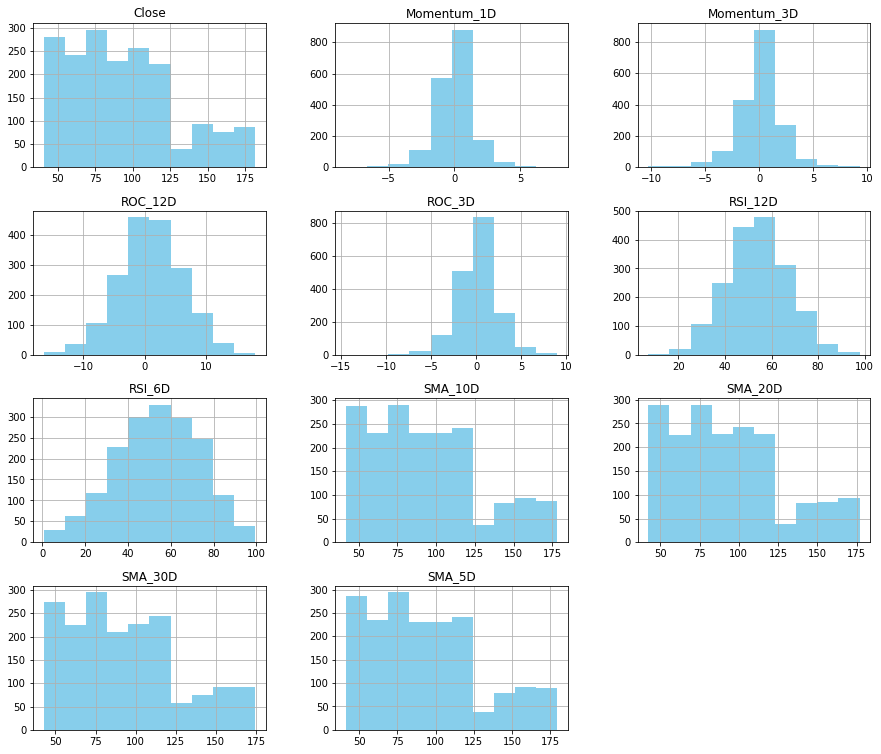

In [13]:
hist[["Close","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","RSI_6D","RSI_12D","SMA_5D","SMA_10D","SMA_20D","SMA_30D"]].hist(figsize=(15,13),color='skyblue')

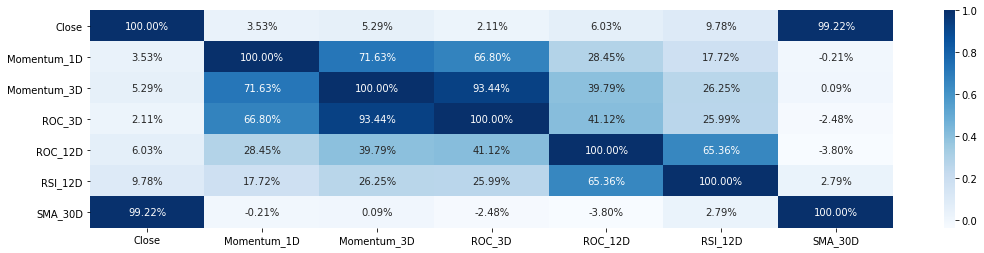

In [14]:
import seaborn as sns
names = ["Close","Momentum_1D","Momentum_3D","ROC_3D","ROC_12D","RSI_12D","SMA_30D"]
corr = hist[names].corr()
fig = plt.figure(figsize=(18,4))
ax = fig.add_subplot(111)

sns.heatmap(corr,cmap=plt.cm.Blues, annot=True, fmt=".2%", ax=ax)